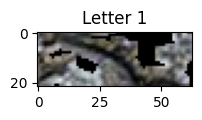

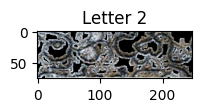

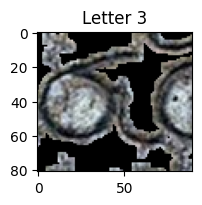

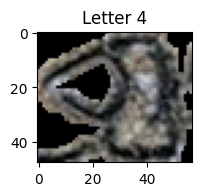

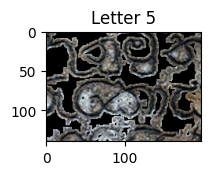

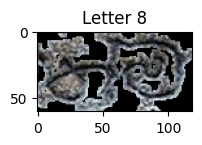

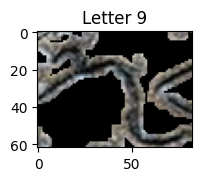

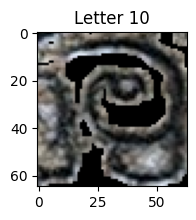

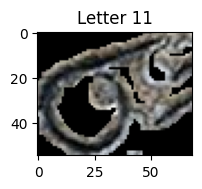

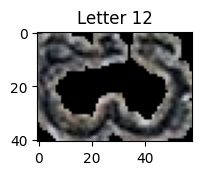

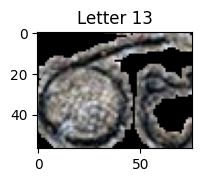

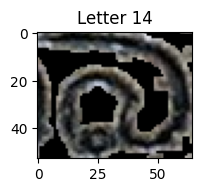

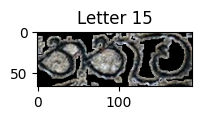

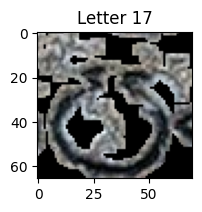

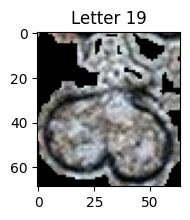

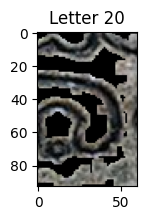

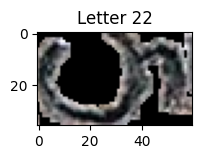

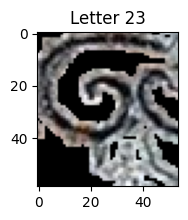

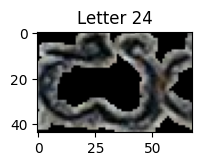

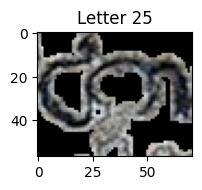

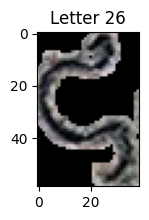

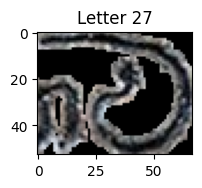

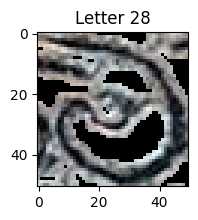

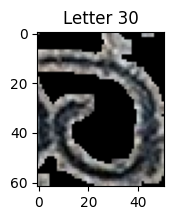

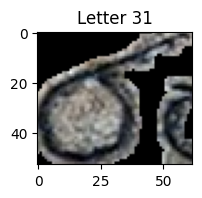

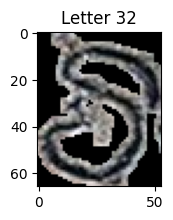

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'plate.jpg'  # Change this to the path of your image
img = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve edge detection
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding to create a binary image
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 13, 7)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area (to remove small noise)
min_contour_area = 300
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

# Create a mask for contours
contour_mask = np.zeros_like(gray)

cv2.drawContours(contour_mask, filtered_contours, -1, (255), thickness=cv2.FILLED)

# Apply dilation to separate the lines
kernel = np.ones((5, 5), np.uint8)
dilated_mask = cv2.dilate(contour_mask, kernel, iterations=1)

# Draw the dilated mask on a blank image
dilated_img = np.zeros_like(img)
dilated_img[dilated_mask > 0] = img[dilated_mask > 0]

# Crop and print each letter
for i, cnt in enumerate(filtered_contours):
    x, y, w, h = cv2.boundingRect(cnt)

    # Check conditions for cropping
    if y >= 30 and x >= 30:
        letter_crop = dilated_img[y:y + h, x:x + w]

        # Display each cropped letter
        plt.figure(figsize=(2, 2))
        plt.imshow(cv2.cvtColor(letter_crop, cv2.COLOR_BGR2RGB))
        plt.title(f'Letter {i+1}')
        plt.show()